In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

In [2]:
#read_csv:    Read a comma-separated values (csv) file into DataFrame.
home = pd.read_csv('Bengaluru_House_Data.csv')
home.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
home2 = home.copy()                #returns a shallow copy of dataframe

In [4]:
#info() function is used to print a concise summary of a DataFrame.
#including the index dtype and column dtypes, non-null values and memory usage. Whether to print the full summary.
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
#isna() function detect missing values in the given series object. 
#It return a boolean same-sized object indicating if the values are NA.
home.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
#Checking for count of each categorical columns
def count(df):
    for val in df.columns:               #DataFrame.columns attribute return the column labels of the given Dataframe.
        print(df[val].value_counts())    #Return a Series containing counts of unique values.
        print()
        print("*************************")
        print()

count(home)       

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

*************************

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
14-Nov               1
14-Jul               1
15-Aug               1
16-Jan               1
16-Oct               1
Name: availability, Length: 81, dtype: int64

*************************

Whitefield                540
Sarjapur  Road            399
Electronic City           302
Kanakpura Road            273
Thanisandra               234
                         ... 
Cubbon Road                 1
Subhash Nagar               1
Raja Rajeshwari Nagara      1
Sampangirama Nagar          1
Dhanalakshmi Layout         1
Name: location, Length: 1305, dtype: int64

*************************

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BH

In [7]:
#assuming that these are not a factor for price i.e. removing unecessary columns
del_col = ['area_type','availability','society','balcony']
home = home.drop(del_col, axis=1)          #mean usage when axis is specified explicitly, in which axis=0 along the rows 
                                           #(namely, index in pandas), and axis=1 along the columns

In [8]:
#checking the mean and median for numerical variables
home.describe()      #describe() is used to view some basic statistical details like percentile, mean, std etc.

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [9]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [10]:
#Imputing columns value based on above data
home['location'] = home['location'].fillna('Sarjapur Road')      #Fill NA/NaN values using the specified method.
home['size'] = home['size'].fillna('2 BHK')
home['bath'] = home['bath'].fillna(home['bath'].median())

In [11]:
home.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
#checking the datatype of variables
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [13]:
home.shape    #stores the number of rows and columns as a tuple (number of rows, number of columns) 

(13320, 5)

In [14]:
home['bhk'] = home['size'].apply(lambda x : int(x.split(' ')[0]))      #2 BHK

In [15]:
home.bhk.unique()    #Numpy array of unique values in that column

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
home[home.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
home.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
home[~home['total_sqft'].apply(isFloat)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
...,...,...,...,...,...,...
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13240,Devanahalli,1 BHK,1020 - 1130,2.0,52.570,1
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [20]:
def convertRange(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
home3 = home.copy()

In [22]:
home3['total_sqft'] = home3['total_sqft'].apply(convertRange)
home3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


### Feature Engineering(Narrowing the Ranges)

In [23]:
home4 = home3.copy()
home4['price_per_sqft'] = (home4.price * 100000) / home4.total_sqft
home4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
len(home4.location.unique())

1306

In [25]:
##strip() method removes any spaces or specified characters at the start and end of a string.
home4.location = home4.location.apply(lambda x: x.strip())
location_count = home4.location.value_counts()
location_count

Whitefield                               541
Sarjapur  Road                           399
Electronic City                          304
Kanakpura Road                           273
Thanisandra                              237
                                        ... 
M C Layout                                 1
Maruthi Extension                          1
Adarsh Nagar                               1
Indranagar  100ft road defence colony      1
Pattegarhpalya                             1
Name: location, Length: 1295, dtype: int64

In [26]:
location_count_less_10 = location_count[location_count <= 10]
location_count_less_10

1st Block Koramangala                    10
Gunjur Palya                             10
Dodsworth Layout                         10
Sector 1 HSR Layout                      10
Dairy Circle                             10
                                         ..
M C Layout                                1
Maruthi Extension                         1
Adarsh Nagar                              1
Indranagar  100ft road defence colony     1
Pattegarhpalya                            1
Name: location, Length: 1054, dtype: int64

In [27]:
home4.location = home4.location.apply(lambda x : 'other' if x in location_count_less_10 else x)

In [28]:
home4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


### Outlier Detection and Removal

In [29]:
home4[home4.total_sqft/home4.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [30]:
home4.shape

(13320, 7)

In [31]:
home6 = home4[~(home4.total_sqft/home4.bhk < 300)]
home6.shape

(12576, 7)

In [32]:
home6.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [33]:
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_output = pd.concat([df_output,gen_df],ignore_index =True)
    return df_output
home7 = remove_outliers_sqft(home6)
home7.shape

(10301, 7)

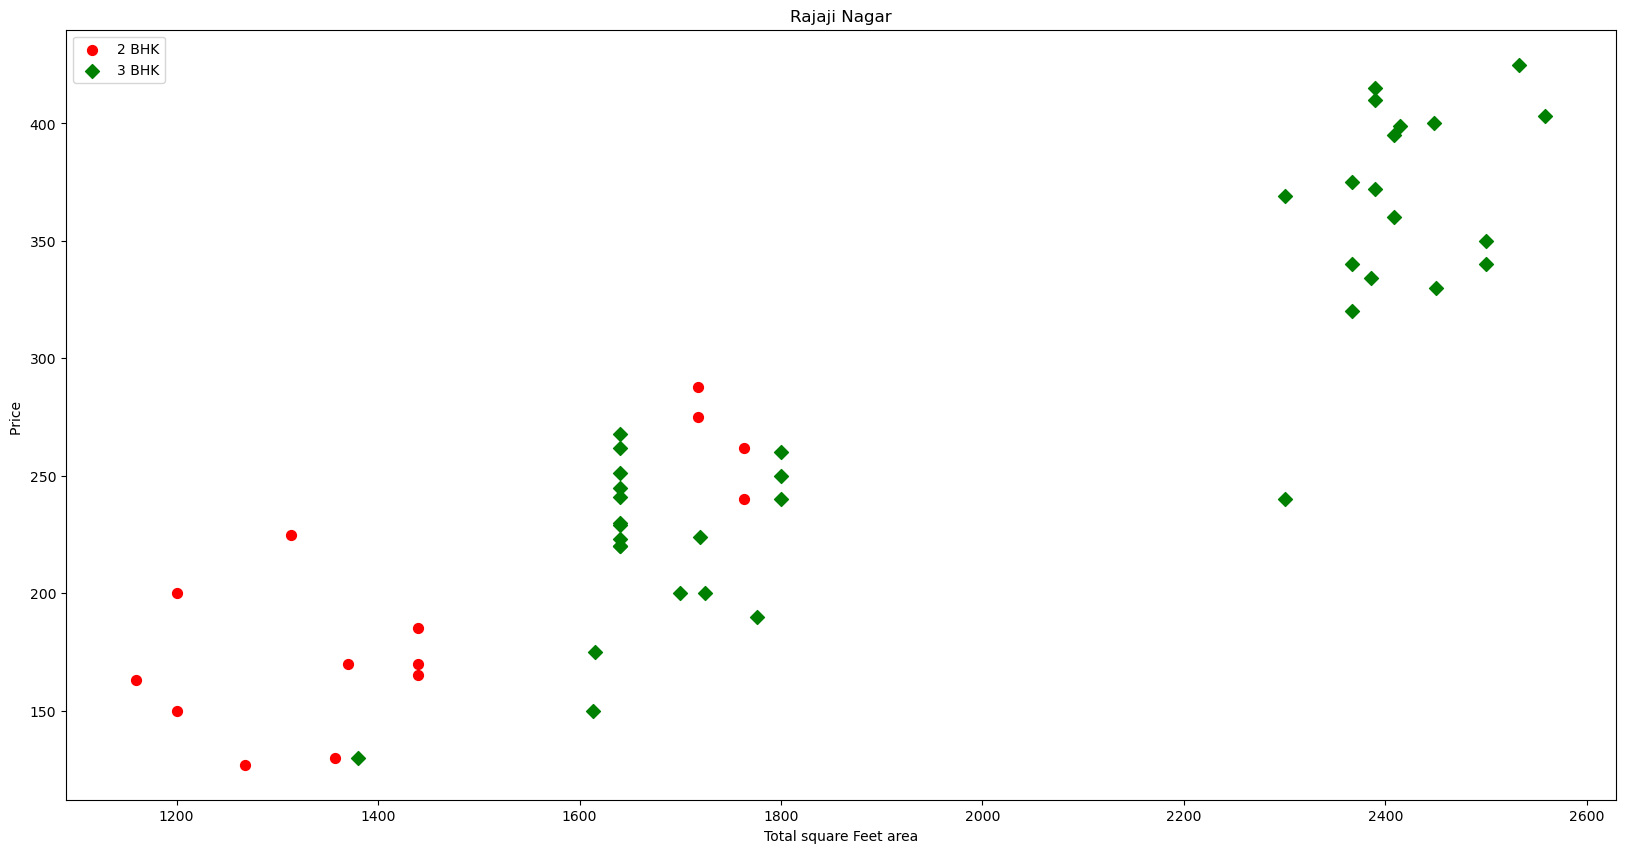

In [34]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (20,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='red',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='D',color='green',label='3 BHK',s=50)
    plt.xlabel('Total square Feet area')
    plt.ylabel('Price ')
    plt.title(location)
    plt.legend()
    plt.show()

plot_scatter_chart(home7,'Rajaji Nagar')    

In [35]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

home8 = bhk_outlier_remover(home7)
home8.shape

(7361, 7)

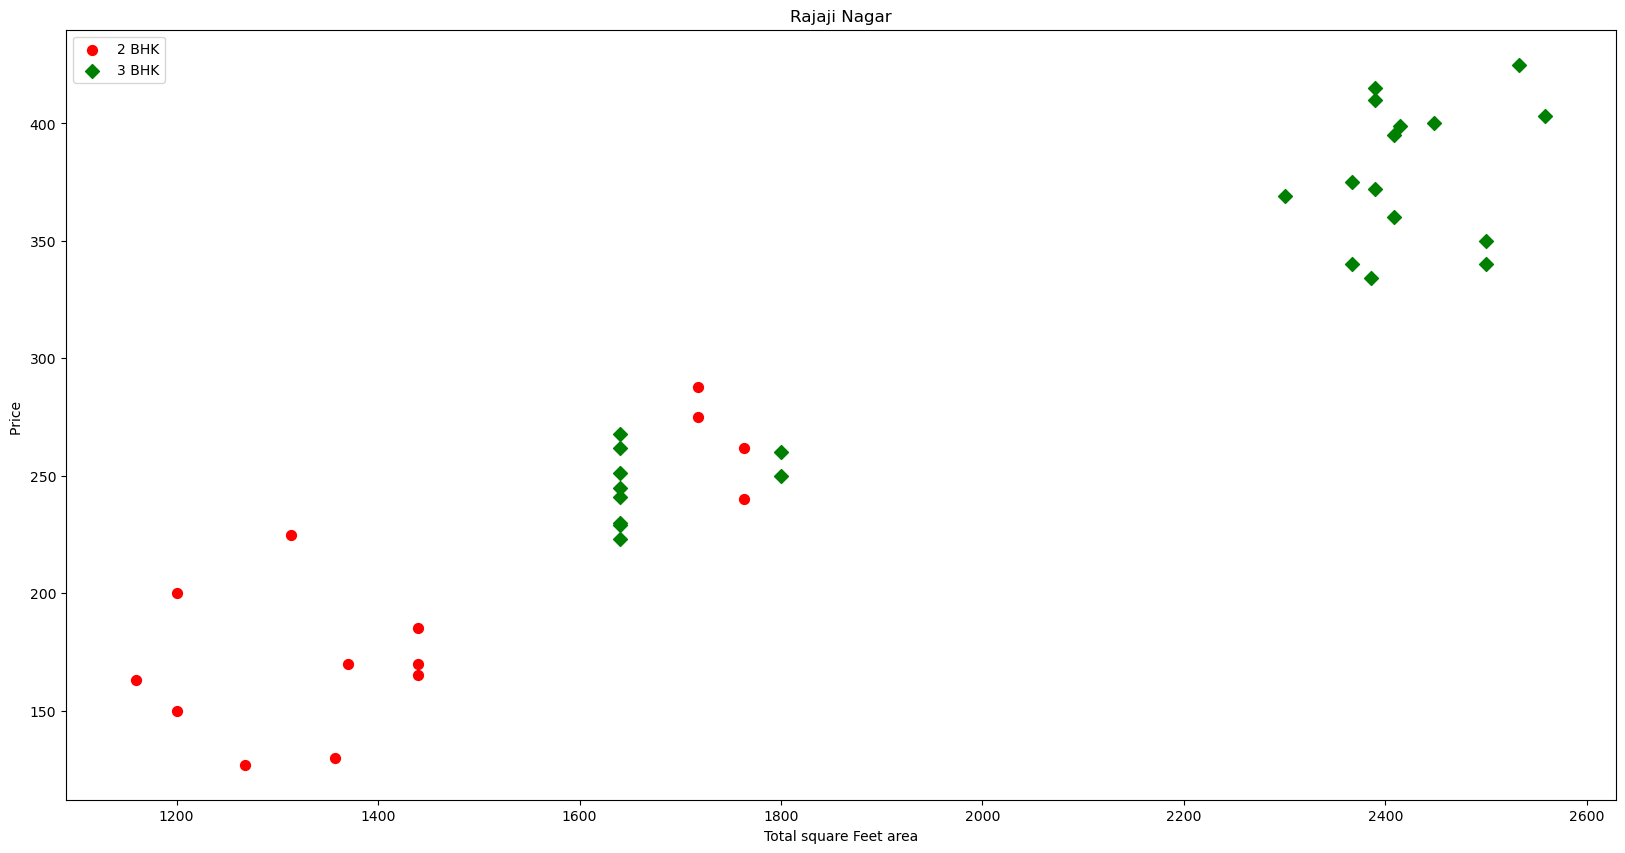

In [36]:
plot_scatter_chart(home8,'Rajaji Nagar')    

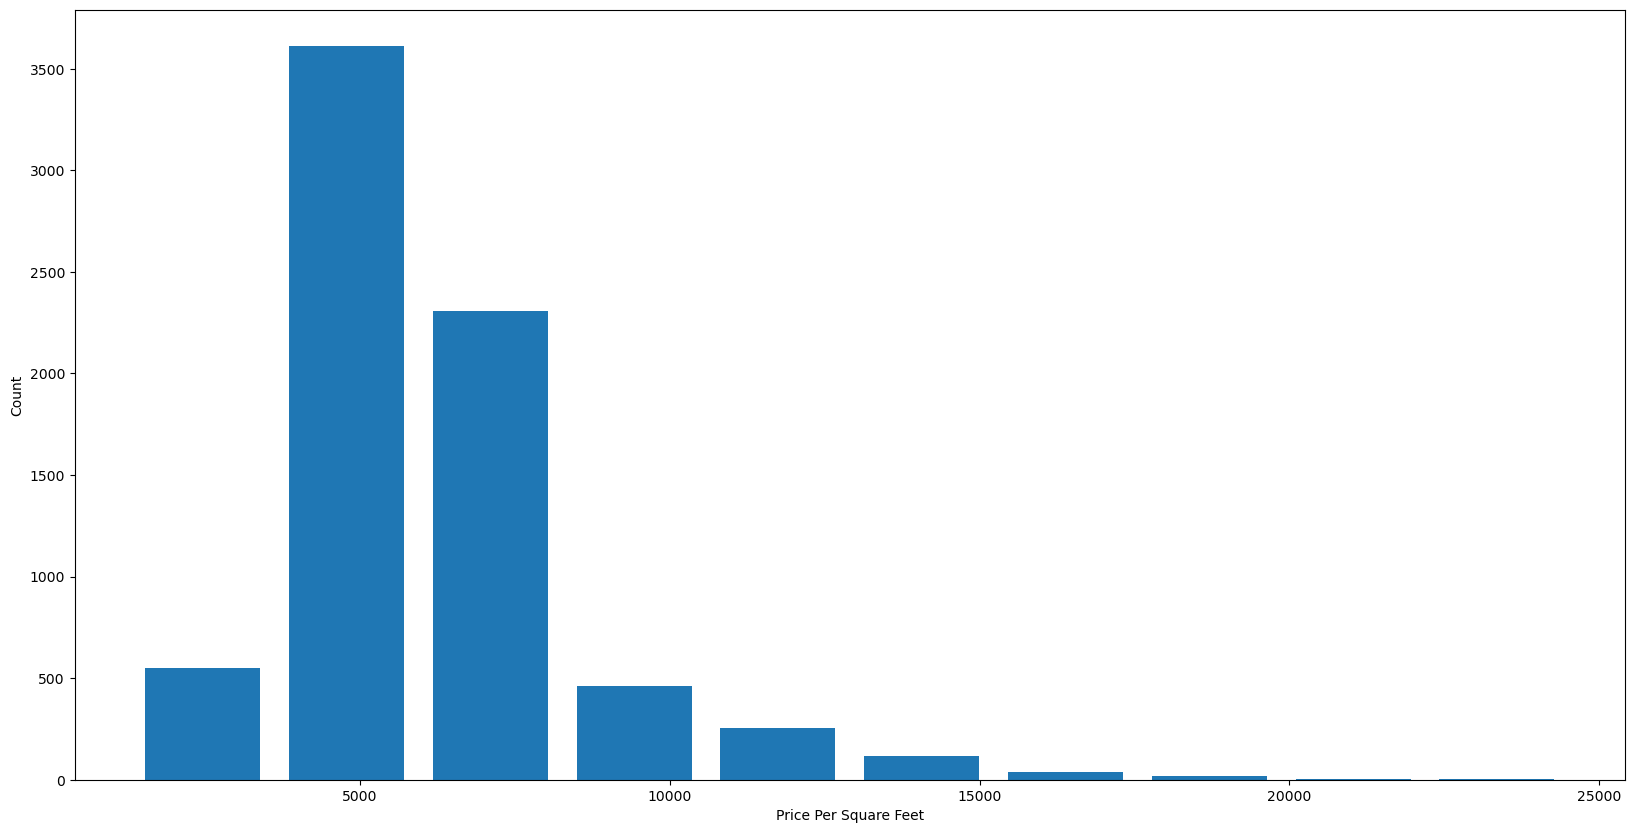

In [37]:
plt.hist(home8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()

#home8["price_per_sqft"].plot(kind = 'hist')

In [38]:
home8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [39]:
plt.hist(home8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

In [40]:
home9 = home8[home8.bath<home8.bhk+2]
home9.shape

(7282, 7)

In [41]:
home9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [42]:
home10 = home9.drop(['size','price_per_sqft'],axis='columns')
home10.head(30)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.00,4
1,1st Block Jayanagar,1630.0,3.0,194.00,3
2,1st Block Jayanagar,1875.0,2.0,235.00,3
3,1st Block Jayanagar,1200.0,2.0,130.00,3
4,1st Block Jayanagar,1235.0,2.0,148.00,2
5,1st Block Jayanagar,2750.0,4.0,413.00,4
6,1st Block Jayanagar,2450.0,4.0,368.00,4
8,1st Phase JP Nagar,1875.0,3.0,167.00,3
9,1st Phase JP Nagar,1500.0,5.0,85.00,5
10,1st Phase JP Nagar,2065.0,4.0,210.00,3


In [43]:
home10.bath.value_counts()

2.0     4233
3.0     1765
1.0      569
4.0      496
5.0      154
6.0       37
7.0       10
8.0        9
9.0        6
13.0       1
12.0       1
16.0       1
Name: bath, dtype: int64

In [44]:
dummies = pd.get_dummies(home10.location,drop_first=True)    #Convert Series to dummy codes.
dummies

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
home11 = pd.concat([home10,dummies],axis='columns')
home11.head(3)

,location,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
home12 = home11.drop('location',axis='columns')
home12.head()

,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
home12.shape

(7282, 245)

In [48]:
X = home12.drop('price',axis='columns')
X.head(20)

,total_sqft,bath,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1875.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1500.0,5.0,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2065.0,4.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
y = home12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [51]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
linreg.score(X_test,y_test)*100

87.40188439603493

## Use K Fold cross validation to measure accuracy of our LinearRegression model

In [52]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)



array([0.82434219, 0.85894932, 0.86685827, 0.85555673, 0.8174962 ])

# Find best model

In [53]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return linreg.predict([x])[0]

In [54]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

82.4559716533627

In [55]:
predict_price('1st Phase JP Nagar',800, 2, 2)

65.2221606939954

In [56]:
predict_price('Electronic City',600, 1, 2)

10.274800012558202

In [57]:
predict_price('2nd Phase Judicial Layout',1000, 4, 4)

27.002771584970972

In [58]:
predict_price('2nd Stage Nagarbhavi',1000, 4, 4)

186.0851705308998

## Exporting the tested model to a pickle file


In [59]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(linreg,f)
